Training set shape: (37500, 32, 32, 3), Validation set shape: (12500, 32, 32, 3), Test set shape: (10000, 32, 32, 3)


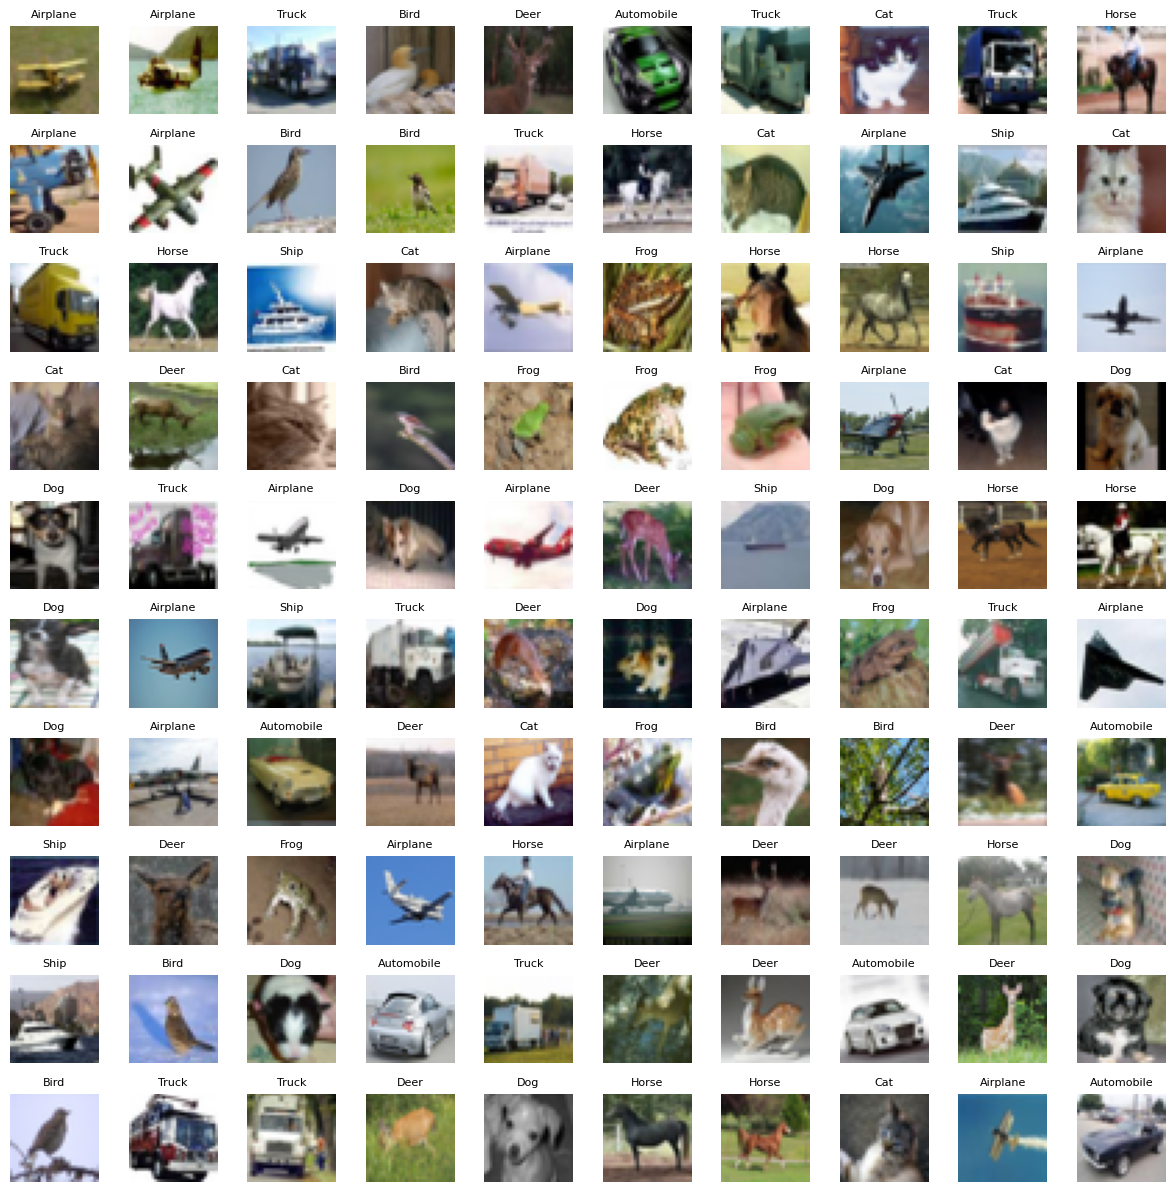

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Loading the CIFAR-10 dataset
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# Split the full training data into training and validation sets (75% train, 25% validation)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.25, random_state=42)

# Normalize the data to the range [-1, 1]
x_train, x_val, x_test = x_train / 255.0, x_val / 255.0, x_test / 255.0
x_train, x_val, x_test = (x_train - 0.5) * 2, (x_val - 0.5) * 2, (x_test - 0.5) * 2

# CIFAR-10 label names
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Print dataset shapes
print(f"Training set shape: {x_train.shape}, Validation set shape: {x_val.shape}, Test set shape: {x_test.shape}")

# Define the showImages function with adjustments for font size and layout
def showImages(num_row, num_col, X, Y, labels):
    fig, axes = plt.subplots(num_row, num_col, figsize=(12, 12))
    for i in range(num_row):
        for j in range(num_col):
            index = i * num_col + j
            ax = axes[i, j]
            ax.imshow((X[index] + 1) / 2)  # Convert back from [-1, 1] to [0, 1]

            # Display label with smaller font size and ensure there's enough space for text
            ax.set_title(f"{labels[Y[index][0]]}", fontsize=8)  # Adjust font size for label
            ax.axis('off')  # Turn off axis to make the image clearer

    plt.tight_layout(pad=1.0)  # Adjust padding between images
    plt.show()

# Display 10x10 grid of images from the training set
num_row = 10
num_col = 10
showImages(num_row, num_col, X=x_train, Y=y_train, labels=labels)


**1) BASIC CNN MODEL**


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.1580 - loss: 2.4387 - val_accuracy: 0.3641 - val_loss: 1.7948
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 24ms/step - accuracy: 0.2838 - loss: 1.9306 - val_accuracy: 0.4347 - val_loss: 1.5871
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.3413 - loss: 1.7824 - val_accuracy: 0.4709 - val_loss: 1.4677
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.3787 - loss: 1.6932 - val_accuracy: 0.4930 - val_loss: 1.3944
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.4119 - loss: 1.6122 - val_accuracy: 0.5243 - val_loss: 1.3211
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.4324 - loss: 1.5549 - val_accuracy: 0.5418 - val_loss: 1.2706
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.4611 - loss: 1.5008 - val_accuracy: 0.5188 - val_loss: 1.3925
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.4763 - loss: 1.45

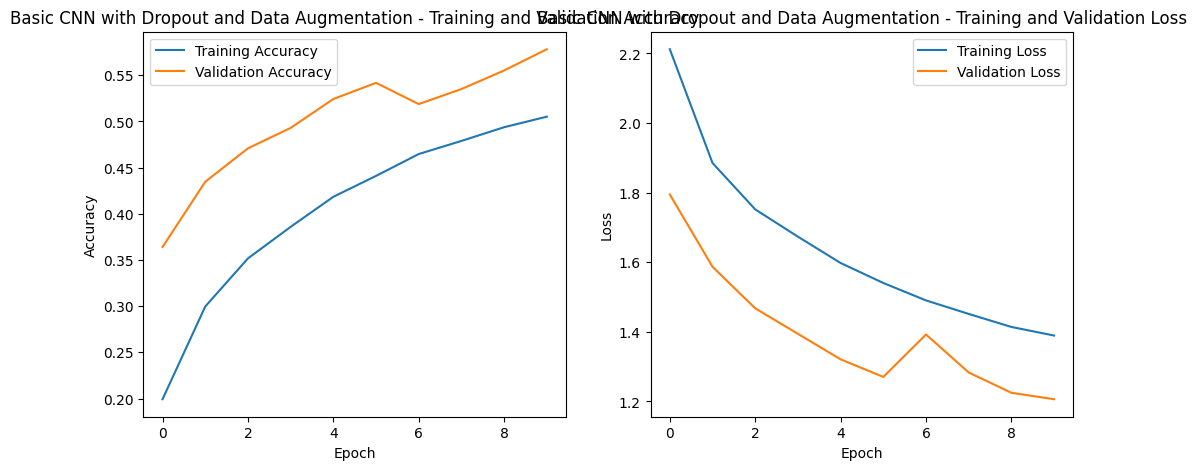

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report for Basic CNN Model:
              precision    recall  f1-score   support

           0       0.66      0.58      0.62      1000
           1       0.65      0.74      0.70      1000
           2       0.54      0.29      0.38      1000
           3       0.49      0.23      0.31      1000
           4       0.62      0.38      0.47      1000
           5       0.62      0.46      0.53      1000
           6       0.55      0.83      0.66      1000
           7       0.57      0.68      0.62      1000
           8       0.69      0.77      0.73      1000
           9       0.46      0.83      0.59      1000

    accuracy                           0.58     10000
   macro avg       0.58      0.58      0.56     10000
weighted avg       0.58      0.58      0.56     10000


Confusion Matrix:
 [[578  74  32   2   7   0  10  13 175 109]
 [  7 741   1   1   0   1   7   1  21 220]
 [116  36 287  48 128  55 146  83  29  72]
 [ 30  3

In [1]:


# Data Augmentation for training
datagen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)

# Basic CNN model with Dropout layers to prevent overfitting
def create_basic_cnn():
    model = models.Sequential([
        # First Convolutional Block
        layers.Conv2D(32, (3, 3), activation=None, input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.MaxPooling2D((2, 2)),

        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), activation=None),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.MaxPooling2D((2, 2)),

        # Third Convolutional Block with Dropout
        layers.Conv2D(64, (3, 3), activation=None),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Dropout(0.5),  # Dropout layer to reduce overfitting

        # Fully Connected Layers
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),  # Dropout in dense layer for added regularization
        layers.Dense(10, activation='softmax')  # Output layer with 10 classes
    ])
    return model

# Initialize and compile the model
basic_cnn_model = create_basic_cnn()
basic_cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

# Set up Early Stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with data augmentation
history_cnn = basic_cnn_model.fit(datagen.flow(x_train, y_train, batch_size=32),
                                  epochs=10, validation_data=(x_test, y_test),
                                  callbacks=[early_stopping])

#  Plot Training and Validation Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Basic CNN with Dropout and Data Augmentation - Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('Basic CNN with Dropout and Data Augmentation - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate Model Performance with Detailed Classification Metrics

# Prepare test labels in the correct format
y_test_flat = y_test.flatten()  # Flatten y_test for compatibility with sklearn metrics

# Generate predictions and calculate detailed metrics
y_pred_probs = basic_cnn_model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Classification report: Precision, Recall, and F1-score
print("Classification Report for Basic CNN Model:")
print(classification_report(y_test_flat, y_pred_classes, target_names=[str(i) for i in range(10)]))

# Confusion Matrix to calculate Sensitivity and Specificity
conf_matrix = confusion_matrix(y_test_flat, y_pred_classes)
print("\nConfusion Matrix:\n", conf_matrix)

# Calculate Sensitivity (Recall) and Specificity for each class
print("\nSensitivity and Specificity for each class:")
for i in range(10):
    # True Positives (TP)
    TP = conf_matrix[i, i]

    # False Positives (FP) = Sum of column i excluding TP
    FP = conf_matrix[:, i].sum() - TP

    # False Negatives (FN) = Sum of row i excluding TP
    FN = conf_matrix[i, :].sum() - TP

    # True Negatives (TN) = Sum of all elements - (TP + FP + FN)
    TN = conf_matrix.sum() - (TP + FP + FN)

    # Sensitivity (Recall)
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0

    # Specificity
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

    print(f"Class {i}: Sensitivity (Recall) = {sensitivity:.2f}, Specificity = {specificity:.2f}")


**2) Resnet-18**


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 39ms/step - accuracy: 0.3462 - loss: 1.7777 - val_accuracy: 0.4985 - val_loss: 1.4206
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.5229 - loss: 1.3213 - val_accuracy: 0.5154 - val_loss: 1.4937
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.5933 - loss: 1.1408 - val_accuracy: 0.6153 - val_loss: 1.1825
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.6340 - loss: 1.0288 - val_accuracy: 0.6359 - val_loss: 1.1151
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.6546 - loss: 0.9672 - val_accuracy: 0.7033 - val_loss: 0.8686
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.6874 - loss: 0.8929 - val_accuracy: 0.6676 - val_loss: 1.0264
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.7031 - loss: 0.8449 - val_accuracy: 0.7251 - val_loss: 0.7993
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.7200 - loss: 0.80

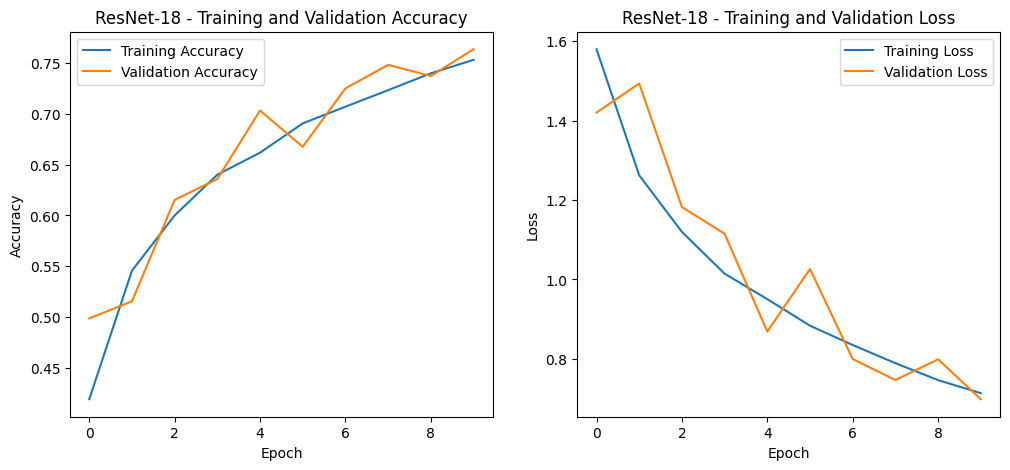

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step
Classification Report for ResNet-18 Model:
              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1000
           1       0.94      0.84      0.89      1000
           2       0.70      0.67      0.68      1000
           3       0.84      0.41      0.55      1000
           4       0.75      0.75      0.75      1000
           5       0.72      0.70      0.71      1000
           6       0.53      0.96      0.68      1000
           7       0.87      0.77      0.82      1000
           8       0.86      0.91      0.88      1000
           9       0.82      0.90      0.86      1000

    accuracy                           0.76     10000
   macro avg       0.79      0.76      0.76     10000
weighted avg       0.79      0.76      0.76     10000


Confusion Matrix:
 [[736  10  52   3  16   5  38  14  79  47]
 [  4 841   1   0   1   1  36   3  11 102]
 [ 37   1 666   7  59  46 154  19   4   7]
 [ 14   

In [2]:
# Define ResNet-18 model with residual blocks and dropout for regularization
def create_resnet18():
    inputs = layers.Input(shape=(32, 32, 3))

    def residual_block(x, filters, stride=1):
        shortcut = x
        x = layers.Conv2D(filters, (3, 3), strides=stride, padding='same', activation=None)(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.Conv2D(filters, (3, 3), strides=1, padding='same', activation=None)(x)
        x = layers.BatchNormalization()(x)

        if stride != 1:
            shortcut = layers.Conv2D(filters, (1, 1), strides=stride, padding='same')(shortcut)

        x = layers.Add()([x, shortcut])
        x = layers.ReLU()(x)
        return x

    # Initial Convolutional Layer
    x = layers.Conv2D(64, (3, 3), padding='same', activation=None)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Residual Blocks
    x = residual_block(x, 64)
    x = layers.Dropout(0.3)(x)  # Dropout to reduce overfitting
    x = residual_block(x, 64)
    x = residual_block(x, 128, stride=2)
    x = layers.Dropout(0.3)(x)
    x = residual_block(x, 128)
    x = residual_block(x, 256, stride=2)
    x = layers.Dropout(0.4)(x)
    x = residual_block(x, 256)

    # Global Average Pooling and Output Layer
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(10, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Initialize and compile the model
resnet18_model = create_resnet18()
resnet18_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Early stopping to stop training if validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with data augmentation
history_resnet = resnet18_model.fit(datagen.flow(x_train, y_train, batch_size=32),
                                    epochs=10, validation_data=(x_test, y_test),
                                    callbacks=[early_stopping])

# Plot Training and Validation Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history_resnet.history['accuracy'], label='Training Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet-18 - Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_resnet.history['loss'], label='Training Loss')
plt.plot(history_resnet.history['val_loss'], label='Validation Loss')
plt.title('ResNet-18 - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate Model Performance with Detailed Classification Metrics
y_test_flat = y_test.flatten()  # Flatten y_test for compatibility with sklearn metrics

# Generate predictions and calculate detailed metrics
y_pred_probs = resnet18_model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Classification report: Precision, Recall, and F1-score
print("Classification Report for ResNet-18 Model:")
print(classification_report(y_test_flat, y_pred_classes, target_names=[str(i) for i in range(10)]))

# Confusion Matrix to calculate Sensitivity and Specificity
conf_matrix = confusion_matrix(y_test_flat, y_pred_classes)
print("\nConfusion Matrix:\n", conf_matrix)

# Calculate Sensitivity (Recall) and Specificity for each class
print("\nSensitivity and Specificity for each class:")
for i in range(10):
    # True Positives (TP)
    TP = conf_matrix[i, i]

    # False Positives (FP) = Sum of column i excluding TP
    FP = conf_matrix[:, i].sum() - TP

    # False Negatives (FN) = Sum of row i excluding TP
    FN = conf_matrix[i, :].sum() - TP

    # True Negatives (TN) = Sum of all elements - (TP + FP + FN)
    TN = conf_matrix.sum() - (TP + FP + FN)

    # Sensitivity (Recall)
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0

    # Specificity
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

    print(f"Class {i}: Sensitivity (Recall) = {sensitivity:.2f}, Specificity = {specificity:.2f}")


**3) Alexnet**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 26ms/step - accuracy: 0.4231 - loss: 34.8359 - val_accuracy: 0.6211 - val_loss: 14.6197
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6555 - loss: 11.9494 - val_accuracy: 0.6977 - val_loss: 6.6225
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.7215 - loss: 5.7103 - val_accuracy: 0.7240 - val_loss: 3.9224
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.7570 - loss: 3.4985 - val_accuracy: 0.6904 - val_loss: 2.9566
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.7877 - loss: 2.5073 - val_accuracy: 0.7744 - val_loss: 2.1660
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.8054 - loss: 1.9683 - val_accuracy: 0.7755 - val_loss: 1.8491
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.8256 - loss: 1.6343 - val_accuracy: 0.7965 - val_loss: 1.5861
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.8387 - loss: 1

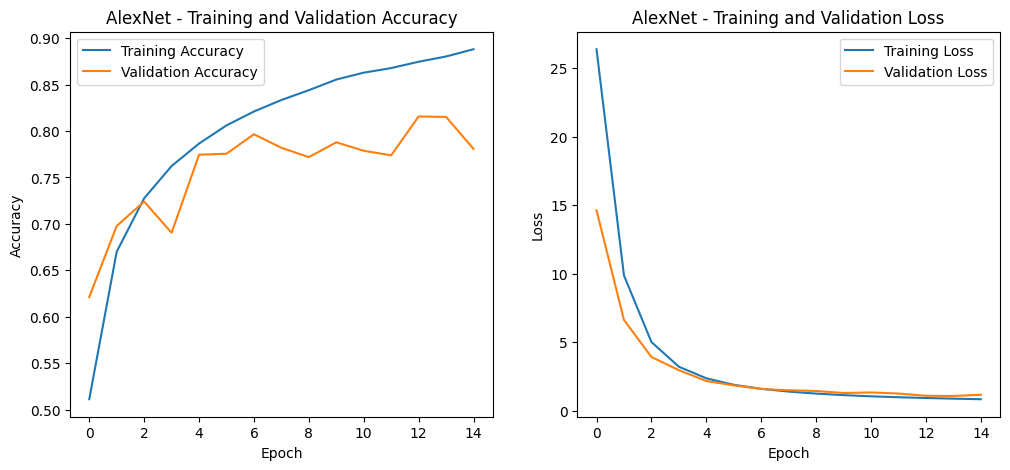

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Classification Report for AlexNet Model:
              precision    recall  f1-score   support

           0       0.88      0.78      0.82      1000
           1       0.89      0.91      0.90      1000
           2       0.88      0.66      0.75      1000
           3       0.59      0.78      0.67      1000
           4       0.83      0.77      0.80      1000
           5       0.69      0.80      0.74      1000
           6       0.94      0.82      0.88      1000
           7       0.92      0.80      0.86      1000
           8       0.91      0.91      0.91      1000
           9       0.78      0.93      0.85      1000

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000


Confusion Matrix:
 [[778  25  18  40  11   6   0   1  44  77]
 [  3 909   1   3   0   3   0   1  14  66]
 [ 55   7 656  96  66  66  25   8   4  17]
 [  5   9 

In [3]:
# Define simpler data augmentation with only horizontal flips
datagen = ImageDataGenerator(horizontal_flip=True)
datagen.fit(x_train)

# Early stopping to prevent overfitting if validation performance plateaus
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

def create_alexnet_v2(dropout_rate=0.3, l2_reg=0.005):
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), strides=1, padding='same', activation=None, input_shape=(32, 32, 3), kernel_regularizer=regularizers.l2(l2_reg)),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(192, (3, 3), padding='same', activation=None, kernel_regularizer=regularizers.l2(l2_reg)),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(384, (3, 3), padding='same', activation=None, kernel_regularizer=regularizers.l2(l2_reg)),
        layers.BatchNormalization(),
        layers.ReLU(),

        layers.Conv2D(256, (3, 3), padding='same', activation=None, kernel_regularizer=regularizers.l2(l2_reg)),
        layers.BatchNormalization(),
        layers.ReLU(),

        layers.Conv2D(256, (3, 3), padding='same', activation=None, kernel_regularizer=regularizers.l2(l2_reg)),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)),
        layers.Dropout(dropout_rate),
        layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)),
        layers.Dropout(dropout_rate),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Compile the AlexNet model with a stable learning rate
alexnet_model = create_alexnet_v2(dropout_rate=0.3, l2_reg=0.005)
alexnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Train the model with early stopping
history_alexnet = alexnet_model.fit(datagen.flow(x_train, y_train, batch_size=32),
                                    epochs=15, validation_data=(x_test, y_test),
                                    callbacks=[early_stopping])

# Plot Accuracy and Loss curves
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_alexnet.history['accuracy'], label='Training Accuracy')
plt.plot(history_alexnet.history['val_accuracy'], label='Validation Accuracy')
plt.title('AlexNet - Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_alexnet.history['loss'], label='Training Loss')
plt.plot(history_alexnet.history['val_loss'], label='Validation Loss')
plt.title('AlexNet - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate model performance with precision, recall, F1-score, sensitivity, and specificity
y_test_flat = y_test.flatten()  # Flatten y_test for compatibility with sklearn metrics

# Generate predictions and calculate classification report
y_pred_probs = alexnet_model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Classification report: Precision, Recall, and F1-score
print("Classification Report for AlexNet Model:")
print(classification_report(y_test_flat, y_pred_classes, target_names=[str(i) for i in range(10)]))

# Confusion Matrix to calculate Sensitivity and Specificity
conf_matrix = confusion_matrix(y_test_flat, y_pred_classes)
print("\nConfusion Matrix:\n", conf_matrix)

# Calculate Sensitivity (Recall) and Specificity for each class
print("\nSensitivity and Specificity for each class:")
for i in range(10):
    # True Positives (TP)
    TP = conf_matrix[i, i]

    # False Positives (FP) = Sum of column i excluding TP
    FP = conf_matrix[:, i].sum() - TP

    # False Negatives (FN) = Sum of row i excluding TP
    FN = conf_matrix[i, :].sum() - TP

    # True Negatives (TN) = Sum of all elements - (TP + FP + FN)
    TN = conf_matrix.sum() - (TP + FP + FN)

    # Sensitivity (Recall)
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0

    # Specificity
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

    print(f"Class {i}: Sensitivity (Recall) = {sensitivity:.2f}, Specificity = {specificity:.2f}")


**4) Mobilenet**

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 64s 36ms/step - accuracy: 0.2573 - loss: 2.0258 - val_accuracy: 0.3502 - val_loss: 1.7313
Epoch 2/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 64s 28ms/step - accuracy: 0.4193 - loss: 1.5861 - val_accuracy: 0.4458 - val_loss: 1.5455
Epoch 3/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.4733 - loss: 1.4568 - val_accuracy: 0.5031 - val_loss: 1.3995
Epoch 4/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.5086 - loss: 1.3711 - val_accuracy: 0.5233 - val_loss: 1.3343
Epoch 5/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 32s 27ms/step - accuracy: 0.5342 - loss: 1.2989 - val_accuracy: 0.5372 - val_loss: 1.3048
Epoch 6/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 31s 27ms/step - accuracy: 0.5600 - loss: 1.2397 - val_accuracy: 0.5361 - val_loss: 1.3414
Epoch 7/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 31s 26ms/step - accuracy: 0.5704 - loss: 1.2151 - val_accuracy: 0.5771 - val_loss: 1.2022
Epoch 8/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.5856 - loss: 1.16

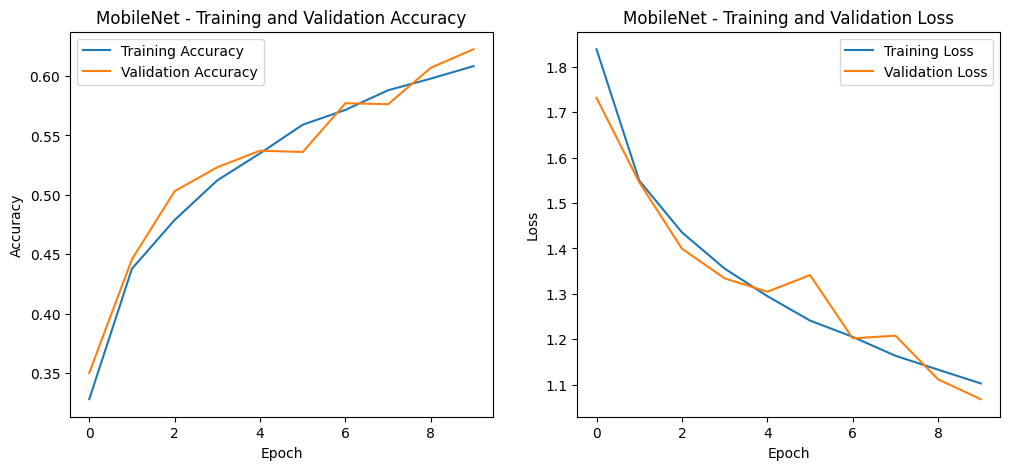

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
Classification Report for MobileNet Model:
              precision    recall  f1-score   support

           0       0.67      0.66      0.66      1000
           1       0.84      0.64      0.72      1000
           2       0.64      0.31      0.42      1000
           3       0.52      0.29      0.37      1000
           4       0.45      0.68      0.54      1000
           5       0.66      0.45      0.53      1000
           6       0.53      0.86      0.65      1000
           7       0.67      0.69      0.68      1000
           8       0.78      0.75      0.77      1000
           9       0.61      0.86      0.71      1000

    accuracy                           0.62     10000
   macro avg       0.64      0.62      0.61     10000
weighted avg       0.64      0.62      0.61     10000


Confusion Matrix:
 [[658  28  44   9  21   5  32  22 100  81]
 [ 22 635   0   3  10   2  25  11  17 275]
 [ 95   3 309  53 214  34 218  38  15  21]
 [ 37   

In [4]:
# Define data augmentation
datagen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Define MobileNet model with Dropout
def create_mobilenet():
    inputs = layers.Input(shape=(32, 32, 3))

    def depthwise_separable_conv(x, filters, strides=1):
        x = layers.DepthwiseConv2D((3, 3), strides=strides, padding='same', activation=None)(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.Conv2D(filters, (1, 1), padding='same', activation=None)(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        return x

    x = layers.Conv2D(32, (3, 3), padding='same', activation=None)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = depthwise_separable_conv(x, 64)
    x = layers.Dropout(0.3)(x)  # Dropout layer to reduce overfitting
    x = depthwise_separable_conv(x, 128, strides=2)
    x = depthwise_separable_conv(x, 128)
    x = layers.Dropout(0.3)(x)
    x = depthwise_separable_conv(x, 256, strides=2)
    x = depthwise_separable_conv(x, 256)
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(10, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Create and compile the model
mobilenet_model = create_mobilenet()
mobilenet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

# Train the model with data augmentation and early stopping
history_mobilenet = mobilenet_model.fit(datagen.flow(x_train, y_train, batch_size=32),
                                        epochs=10, validation_data=(x_val, y_val),
                                        callbacks=[early_stopping])

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_mobilenet.history['accuracy'], label='Training Accuracy')
plt.plot(history_mobilenet.history['val_accuracy'], label='Validation Accuracy')
plt.title('MobileNet - Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_mobilenet.history['loss'], label='Training Loss')
plt.plot(history_mobilenet.history['val_loss'], label='Validation Loss')
plt.title('MobileNet - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate model performance with precision, recall, F1-score, sensitivity, and specificity
y_test_flat = y_test.flatten()  # Flatten y_test for compatibility with sklearn metrics

# Generate predictions and calculate classification report
y_pred_probs = mobilenet_model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Classification report: Precision, Recall, and F1-score
print("Classification Report for MobileNet Model:")
print(classification_report(y_test_flat, y_pred_classes, target_names=[str(i) for i in range(10)]))

# Confusion Matrix to calculate Sensitivity and Specificity
conf_matrix = confusion_matrix(y_test_flat, y_pred_classes)
print("\nConfusion Matrix:\n", conf_matrix)

# Calculate Sensitivity (Recall) and Specificity for each class
print("\nSensitivity and Specificity for each class:")
for i in range(10):
    # True Positives (TP)
    TP = conf_matrix[i, i]

    # False Positives (FP) = Sum of column i excluding TP
    FP = conf_matrix[:, i].sum() - TP

    # False Negatives (FN) = Sum of row i excluding TP
    FN = conf_matrix[i, :].sum() - TP

    # True Negatives (TN) = Sum of all elements - (TP + FP + FN)
    TN = conf_matrix.sum() - (TP + FP + FN)

    # Sensitivity (Recall)
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0

    # Specificity
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

    print(f"Class {i}: Sensitivity (Recall) = {sensitivity:.2f}, Specificity = {specificity:.2f}")


**5) Tuned Basic CNN model**

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.1324 - loss: 3.8541 - val_accuracy: 0.2737 - val_loss: 3.1660 - learning_rate: 5.0000e-05
Epoch 2/15
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.2056 - loss: 3.3379 - val_accuracy: 0.3162 - val_loss: 3.0408 - learning_rate: 5.0000e-05
Epoch 3/15
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2330 - loss: 3.2060 - val_accuracy: 0.3482 - val_loss: 2.9628 - learning_rate: 5.0000e-05
Epoch 4/15
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2644 - loss: 3.1126 - val_accuracy: 0.3683 - val_loss: 2.8908 - learning_rate: 5.0000e-05
Epoch 5/15
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2826 - loss: 3.0400 - val_accuracy: 0.3878 - val_loss: 2.8124 - learning_rate: 5.0000e-05
Epoch 6/15
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2981 - loss: 2.9868 - val_accuracy: 0.4085 - val_loss: 2.7560 - learning_rate: 5.0000e-05
Epoch 7/15
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accur

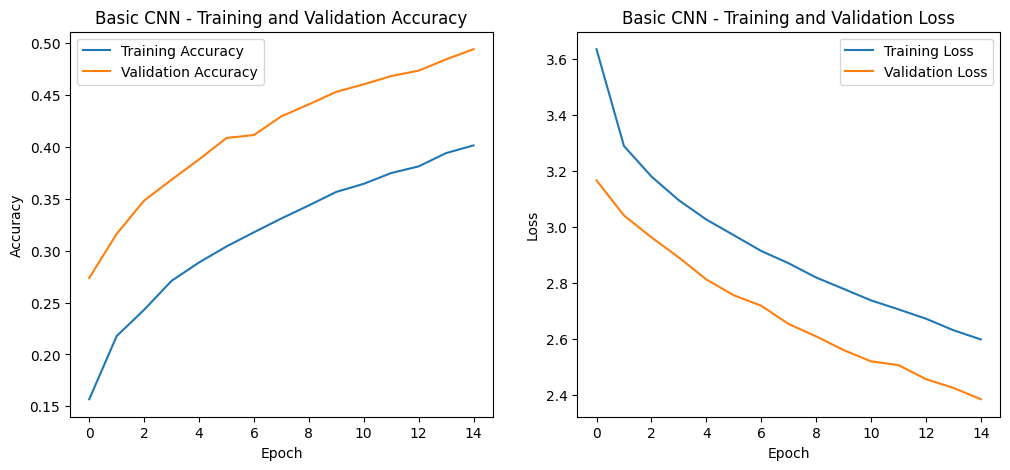

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report for Basic CNN Model:
              precision    recall  f1-score   support

           0       0.51      0.54      0.52      1000
           1       0.61      0.66      0.63      1000
           2       0.36      0.30      0.33      1000
           3       0.35      0.25      0.29      1000
           4       0.45      0.27      0.34      1000
           5       0.39      0.58      0.47      1000
           6       0.57      0.66      0.61      1000
           7       0.51      0.60      0.55      1000
           8       0.56      0.54      0.55      1000
           9       0.61      0.56      0.58      1000

    accuracy                           0.50     10000
   macro avg       0.49      0.50      0.49     10000
weighted avg       0.49      0.50      0.49     10000


Confusion Matrix:
 [[538  52  56  26  14  27  18  30 196  43]
 [ 43 660   6   8   3   8  16  27  72 157]
 [ 92  15 298  86 139 156 102  83  20   9]
 [ 26  1

In [23]:
# Define data augmentation
datagen = ImageDataGenerator(horizontal_flip=True)
datagen.fit(x_train)

# Set up a learning rate scheduler to reduce learning rate on plateau
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Define Basic CNN model with dropout and L2 regularization
def create_basic_cnn_v4(dropout_rate=0.4, l2_reg=0.005):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation=None, input_shape=(32, 32, 3), kernel_regularizer=regularizers.l2(l2_reg)),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation=None, kernel_regularizer=regularizers.l2(l2_reg)),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation=None, kernel_regularizer=regularizers.l2(l2_reg)),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Dropout(dropout_rate),

        layers.Flatten(),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)),
        layers.Dropout(dropout_rate),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Compile the model with a smaller learning rate and momentum for stability
basic_cnn_tuned_model = create_basic_cnn_v4(dropout_rate=0.4, l2_reg=0.005)
basic_cnn_tuned_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.00005, momentum=0.9),
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

# Train the model for 15 epochs to allow for better convergence
history = basic_cnn_tuned_model.fit(datagen.flow(x_train, y_train, batch_size=32),
                              epochs=15, validation_data=(x_val, y_val),
                              callbacks=[lr_scheduler])

# Plot Accuracy and Loss curves
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Basic CNN - Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Basic CNN - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate model performance with precision, recall, F1-score, sensitivity, and specificity
y_test_flat = y_test.flatten()  # Flatten y_test for compatibility with sklearn metrics

# Generate predictions and calculate classification report
y_pred_probs = basic_cnn_tuned_model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Classification report: Precision, Recall, and F1-score
print("Classification Report for Basic CNN Model:")
print(classification_report(y_test_flat, y_pred_classes, target_names=[str(i) for i in range(10)]))

# Confusion Matrix to calculate Sensitivity and Specificity
conf_matrix = confusion_matrix(y_test_flat, y_pred_classes)
print("\nConfusion Matrix:\n", conf_matrix)

# Calculate Sensitivity (Recall) and Specificity for each class
print("\nSensitivity and Specificity for each class:")
for i in range(10):
    # True Positives (TP)
    TP = conf_matrix[i, i]

    # False Positives (FP) = Sum of column i excluding TP
    FP = conf_matrix[:, i].sum() - TP

    # False Negatives (FN) = Sum of row i excluding TP
    FN = conf_matrix[i, :].sum() - TP

    # True Negatives (TN) = Sum of all elements - (TP + FP + FN)
    TN = conf_matrix.sum() - (TP + FP + FN)

    # Sensitivity (Recall)
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0

    # Specificity
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

    print(f"Class {i}: Sensitivity (Recall) = {sensitivity:.2f}, Specificity = {specificity:.2f}")


**6) Tuned Resnet-18**


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 66s 43ms/step - accuracy: 0.3486 - loss: 9.3062 - val_accuracy: 0.4918 - val_loss: 6.9374
Epoch 2/15
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 36s 31ms/step - accuracy: 0.5434 - loss: 6.3215 - val_accuracy: 0.5891 - val_loss: 5.1782
Epoch 3/15
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 33s 28ms/step - accuracy: 0.6223 - loss: 4.8108 - val_accuracy: 0.6290 - val_loss: 4.1743
Epoch 4/15
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 43s 30ms/step - accuracy: 0.6663 - loss: 3.8830 - val_accuracy: 0.6824 - val_loss: 3.4441
Epoch 5/15
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 32s 28ms/step - accuracy: 0.7151 - loss: 3.2361 - val_accuracy: 0.7193 - val_loss: 2.9606
Epoch 6/15
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.7464 - loss: 2.7890 - val_accuracy: 0.7105 - val_loss: 2.7283
Epoch 7/15
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 39s 27ms/step - accuracy: 0.7678 - loss: 2.4520 - val_accuracy: 0.7662 - val_loss: 2.3127
Epoch 8/15
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 32s 27ms/step - accuracy: 0.7885 - loss: 2.19

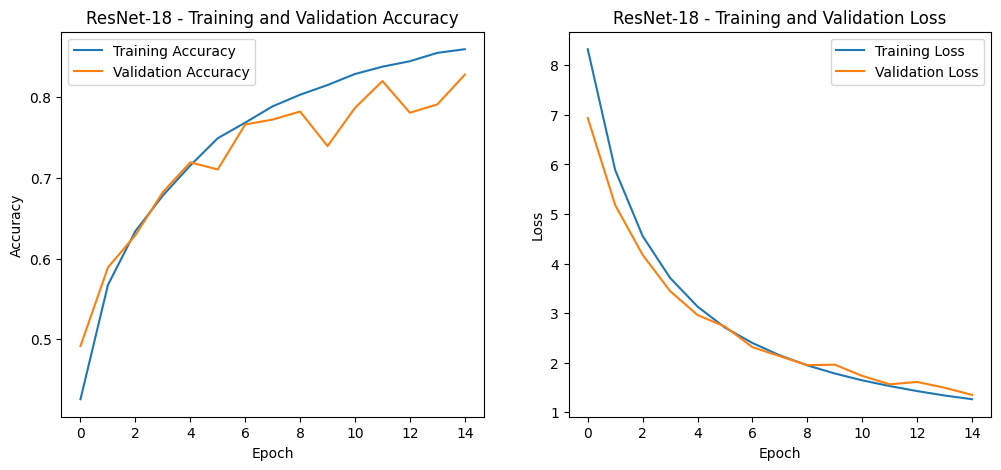

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step
Classification Report for ResNet-18 Model:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83      1000
           1       0.77      0.98      0.86      1000
           2       0.76      0.77      0.77      1000
           3       0.64      0.76      0.69      1000
           4       0.82      0.84      0.83      1000
           5       0.84      0.70      0.77      1000
           6       0.94      0.79      0.86      1000
           7       0.92      0.85      0.88      1000
           8       0.94      0.85      0.90      1000
           9       0.95      0.81      0.87      1000

    accuracy                           0.82     10000
   macro avg       0.84      0.82      0.82     10000
weighted avg       0.84      0.82      0.82     10000


Confusion Matrix:
 [[901  29  20  11   4   0   1   5  25   4]
 [  2 981   0   4   1   0   0   0   2  10]
 [ 81  13 766  38  42  31  13  11   3   2]
 [ 40  1

In [24]:
# Define data augmentation with only horizontal flips
datagen = ImageDataGenerator(horizontal_flip=True)
datagen.fit(x_train)

# Early stopping to prevent overfitting if validation performance plateaus
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define ResNet-18 model with dropout and L2 regularization
def create_resnet18_v3(dropout_rate=0.2, l2_reg=0.005):
    inputs = layers.Input(shape=(32, 32, 3))

    def residual_block(x, filters, stride=1):
        shortcut = x
        x = layers.Conv2D(filters, (3, 3), strides=stride, padding='same', activation=None, kernel_regularizer=regularizers.l2(l2_reg))(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.Conv2D(filters, (3, 3), strides=1, padding='same', activation=None, kernel_regularizer=regularizers.l2(l2_reg))(x)
        x = layers.BatchNormalization()(x)

        if stride != 1:
            shortcut = layers.Conv2D(filters, (1, 1), strides=stride, padding='same')(shortcut)

        x = layers.Add()([x, shortcut])
        x = layers.ReLU()(x)
        return x

    x = layers.Conv2D(64, (3, 3), padding='same', activation=None, kernel_regularizer=regularizers.l2(l2_reg))(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = residual_block(x, 64)
    x = layers.Dropout(dropout_rate)(x)  # Reduced dropout rate
    x = residual_block(x, 64)
    x = residual_block(x, 128, stride=2)
    x = layers.Dropout(dropout_rate)(x)
    x = residual_block(x, 128)
    x = residual_block(x, 256, stride=2)
    x = layers.Dropout(0.3)(x)  # Moderate dropout for deeper layers
    x = residual_block(x, 256)
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(10, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Compile the model
resnet18_tuned_model = create_resnet18_v3(dropout_rate=0.2, l2_reg=0.005)
resnet18_tuned_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Train the model with data augmentation and early stopping
history_resnet = resnet18_tuned_model.fit(datagen.flow(x_train, y_train, batch_size=32),
                                    epochs=15, validation_data=(x_val, y_val),
                                    callbacks=[early_stopping])

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_resnet.history['accuracy'], label='Training Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet-18 - Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_resnet.history['loss'], label='Training Loss')
plt.plot(history_resnet.history['val_loss'], label='Validation Loss')
plt.title('ResNet-18 - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate model performance with precision, recall, F1-score, sensitivity, and specificity
y_test_flat = y_test.flatten()  # Flatten y_test for compatibility with sklearn metrics

# Generate predictions and calculate classification report
y_pred_probs = resnet18_tuned_model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Classification report: Precision, Recall, and F1-score
print("Classification Report for ResNet-18 Model:")
print(classification_report(y_test_flat, y_pred_classes, target_names=[str(i) for i in range(10)]))

# Confusion Matrix to calculate Sensitivity and Specificity
conf_matrix = confusion_matrix(y_test_flat, y_pred_classes)
print("\nConfusion Matrix:\n", conf_matrix)

# Calculate Sensitivity (Recall) and Specificity for each class
print("\nSensitivity and Specificity for each class:")
for i in range(10):
    # True Positives (TP)
    TP = conf_matrix[i, i]

    # False Positives (FP) = Sum of column i excluding TP
    FP = conf_matrix[:, i].sum() - TP

    # False Negatives (FN) = Sum of row i excluding TP
    FN = conf_matrix[i, :].sum() - TP

    # True Negatives (TN) = Sum of all elements - (TP + FP + FN)
    TN = conf_matrix.sum() - (TP + FP + FN)

    # Sensitivity (Recall)
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0

    # Specificity
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

    print(f"Class {i}: Sensitivity (Recall) = {sensitivity:.2f}, Specificity = {specificity:.2f}")


**7) Tuned Alexnet**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 44s 31ms/step - accuracy: 0.3913 - loss: 37.4249 - val_accuracy: 0.5918 - val_loss: 18.9655
Epoch 2/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - accuracy: 0.6136 - loss: 16.0294 - val_accuracy: 0.6374 - val_loss: 9.7548
Epoch 3/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 24s 21ms/step - accuracy: 0.6942 - loss: 8.4307 - val_accuracy: 0.7220 - val_loss: 5.7325
Epoch 4/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.7330 - loss: 5.1833 - val_accuracy: 0.6561 - val_loss: 4.2318
Epoch 5/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.7592 - loss: 3.6276 - val_accuracy: 0.7306 - val_loss: 3.0812
Epoch 6/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.7824 - loss: 2.7839 - val_accuracy: 0.7238 - val_loss: 2.6028
Epoch 7/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.7993 - loss: 2.2730 - val_accuracy: 0.7669 - val_loss: 2.1466
Epoch 8/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.8209 - loss: 1

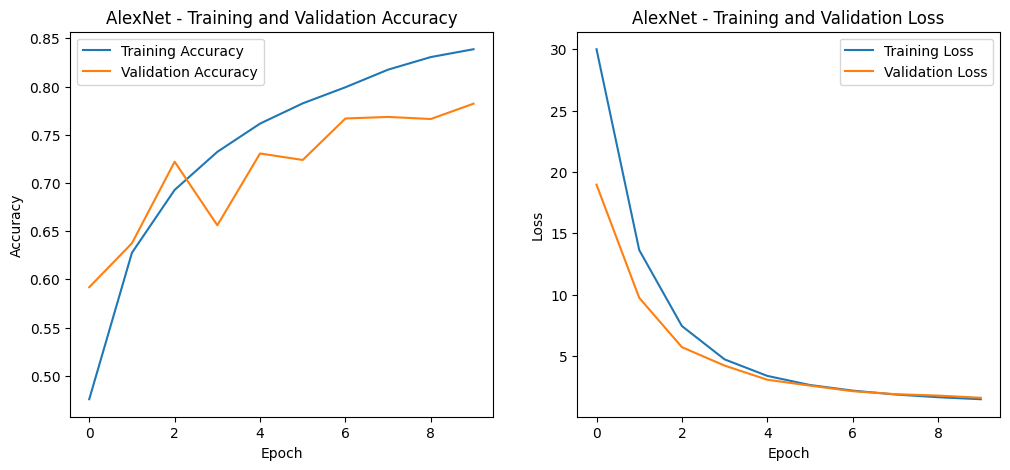

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Classification Report for AlexNet Model:
              precision    recall  f1-score   support

           0       0.87      0.73      0.79      1000
           1       0.94      0.82      0.88      1000
           2       0.71      0.71      0.71      1000
           3       0.64      0.65      0.64      1000
           4       0.56      0.93      0.70      1000
           5       0.86      0.59      0.70      1000
           6       0.87      0.81      0.84      1000
           7       0.88      0.80      0.84      1000
           8       0.79      0.91      0.85      1000
           9       0.91      0.86      0.88      1000

    accuracy                           0.78     10000
   macro avg       0.80      0.78      0.78     10000
weighted avg       0.80      0.78      0.78     10000


Confusion Matrix:
 [[726   6  69  16  69   2   3   7  89  13]
 [  7 820  11   8  13   3  12   1  74  51]
 [ 37   1 708  39 144  16  30  15   7   3]
 [ 12   1 

In [25]:
# Define data augmentation with only horizontal flips
datagen = ImageDataGenerator(horizontal_flip=True)
datagen.fit(x_train)

# Early stopping to prevent overfitting if validation performance plateaus
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define AlexNet model with dropout and L2 regularization
def create_alexnet_v2(dropout_rate=0.3, l2_reg=0.005):
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), strides=1, padding='same', activation=None, input_shape=(32, 32, 3), kernel_regularizer=regularizers.l2(l2_reg)),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(192, (3, 3), padding='same', activation=None, kernel_regularizer=regularizers.l2(l2_reg)),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(384, (3, 3), padding='same', activation=None, kernel_regularizer=regularizers.l2(l2_reg)),
        layers.BatchNormalization(),
        layers.ReLU(),

        layers.Conv2D(256, (3, 3), padding='same', activation=None, kernel_regularizer=regularizers.l2(l2_reg)),
        layers.BatchNormalization(),
        layers.ReLU(),

        layers.Conv2D(256, (3, 3), padding='same', activation=None, kernel_regularizer=regularizers.l2(l2_reg)),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)),
        layers.Dropout(dropout_rate),
        layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)),
        layers.Dropout(dropout_rate),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Compile the AlexNet model with a stable learning rate
alexnet_tuned_model = create_alexnet_v2(dropout_rate=0.3, l2_reg=0.005)
alexnet_tuned_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Train the model with data augmentation and early stopping
history_alexnet = alexnet_tuned_model.fit(datagen.flow(x_train, y_train, batch_size=32),
                                    epochs=10, validation_data=(x_val, y_val),
                                    callbacks=[early_stopping])

# Plot Accuracy and Loss curves
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_alexnet.history['accuracy'], label='Training Accuracy')
plt.plot(history_alexnet.history['val_accuracy'], label='Validation Accuracy')
plt.title('AlexNet - Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_alexnet.history['loss'], label='Training Loss')
plt.plot(history_alexnet.history['val_loss'], label='Validation Loss')
plt.title('AlexNet - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate model performance with precision, recall, F1-score, sensitivity, and specificity
y_test_flat = y_test.flatten()  # Flatten y_test for compatibility with sklearn metrics

# Generate predictions and calculate classification report
y_pred_probs = alexnet_tuned_model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Classification report: Precision, Recall, and F1-score
print("Classification Report for AlexNet Model:")
print(classification_report(y_test_flat, y_pred_classes, target_names=[str(i) for i in range(10)]))

# Confusion Matrix to calculate Sensitivity and Specificity
conf_matrix = confusion_matrix(y_test_flat, y_pred_classes)
print("\nConfusion Matrix:\n", conf_matrix)

# Calculate Sensitivity (Recall) and Specificity for each class
print("\nSensitivity and Specificity for each class:")
for i in range(10):
    # True Positives (TP)
    TP = conf_matrix[i, i]

    # False Positives (FP) = Sum of column i excluding TP
    FP = conf_matrix[:, i].sum() - TP

    # False Negatives (FN) = Sum of row i excluding TP
    FN = conf_matrix[i, :].sum() - TP

    # True Negatives (TN) = Sum of all elements - (TP + FP + FN)
    TN = conf_matrix.sum() - (TP + FP + FN)

    # Sensitivity (Recall)
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0

    # Specificity
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

    print(f"Class {i}: Sensitivity (Recall) = {sensitivity:.2f}, Specificity = {specificity:.2f}")


**8) Tuned MobileNet**

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 33s 16ms/step - accuracy: 0.2315 - loss: 5.1772 - val_accuracy: 0.2687 - val_loss: 4.2007
Epoch 2/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.3923 - loss: 3.7421 - val_accuracy: 0.4025 - val_loss: 3.2555
Epoch 3/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.4694 - loss: 3.0166 - val_accuracy: 0.4584 - val_loss: 2.8026
Epoch 4/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.5150 - loss: 2.6036 - val_accuracy: 0.5013 - val_loss: 2.4617
Epoch 5/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5399 - loss: 2.3335 - val_accuracy: 0.5321 - val_loss: 2.2232
Epoch 6/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5549 - loss: 2.1520 - val_accuracy: 0.5628 - val_loss: 2.0399
Epoch 7/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5794 - loss: 1.9947 - val_accuracy: 0.5918 - val_loss: 1.8853
Epoch 8/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5952 - loss: 1.8735 - v

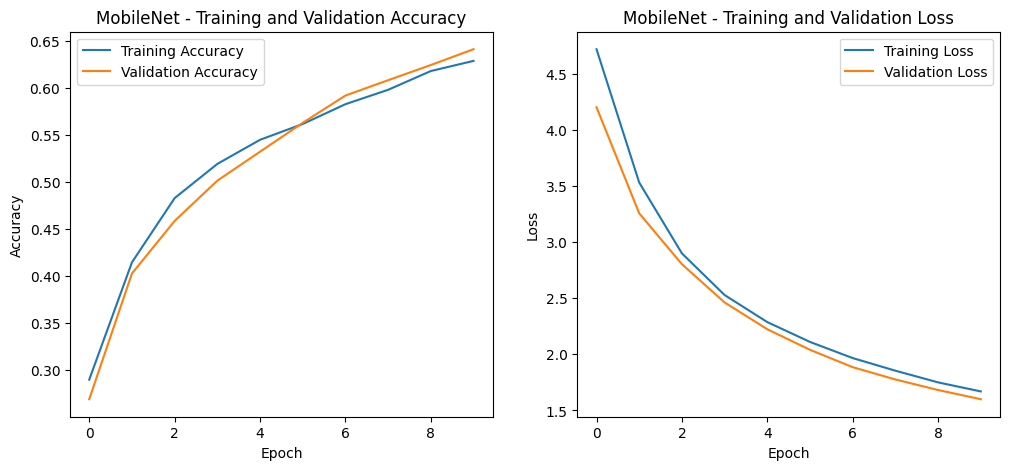

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Classification Report for MobileNet Model:
              precision    recall  f1-score   support

           0       0.71      0.58      0.64      1000
           1       0.82      0.77      0.80      1000
           2       0.53      0.50      0.52      1000
           3       0.47      0.41      0.44      1000
           4       0.52      0.61      0.56      1000
           5       0.46      0.66      0.54      1000
           6       0.76      0.65      0.70      1000
           7       0.81      0.53      0.64      1000
           8       0.65      0.86      0.74      1000
           9       0.77      0.75      0.76      1000

    accuracy                           0.63     10000
   macro avg       0.65      0.63      0.63     10000
weighted avg       0.65      0.63      0.63     10000


Confusion Matrix:
 [[584  23  53  26  10  22  11  12 216  43]
 [ 27 773   8  11   8  11   7   3  49 103]
 [ 69  11 501  74 136 103  55  14  30   7]
 [ 13  1

In [26]:
# Define data augmentation with only horizontal flips
datagen = ImageDataGenerator(horizontal_flip=True)
datagen.fit(x_train)

# Early stopping to prevent overfitting if validation performance plateaus
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define MobileNet model with dropout and L2 regularization
def create_mobilenet_v2(dropout_rate=0.2, l2_reg=0.005):
    inputs = layers.Input(shape=(32, 32, 3))

    def depthwise_separable_conv(x, filters, strides=1):
        x = layers.DepthwiseConv2D((3, 3), strides=strides, padding='same', activation=None)(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.Conv2D(filters, (1, 1), padding='same', activation=None, kernel_regularizer=regularizers.l2(l2_reg))(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        return x

    x = layers.Conv2D(32, (3, 3), padding='same', activation=None, kernel_regularizer=regularizers.l2(l2_reg))(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = depthwise_separable_conv(x, 64)
    x = layers.Dropout(dropout_rate)(x)
    x = depthwise_separable_conv(x, 128, strides=2)
    x = depthwise_separable_conv(x, 128)
    x = layers.Dropout(dropout_rate)(x)
    x = depthwise_separable_conv(x, 256, strides=2)
    x = depthwise_separable_conv(x, 256)
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(10, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Compile the MobileNet model with a stable learning rate
mobilenet_tuned_model = create_mobilenet_v2(dropout_rate=0.2, l2_reg=0.005)
mobilenet_tuned_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

# Train the model with data augmentation and early stopping
history_mobilenet = mobilenet_tuned_model.fit(datagen.flow(x_train, y_train, batch_size=32),
                                        epochs=10, validation_data=(x_val, y_val),
                                        callbacks=[early_stopping])

# Plot Accuracy and Loss curves
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_mobilenet.history['accuracy'], label='Training Accuracy')
plt.plot(history_mobilenet.history['val_accuracy'], label='Validation Accuracy')
plt.title('MobileNet - Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_mobilenet.history['loss'], label='Training Loss')
plt.plot(history_mobilenet.history['val_loss'], label='Validation Loss')
plt.title('MobileNet - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate model performance with precision, recall, F1-score, sensitivity, and specificity
y_test_flat = y_test.flatten()  # Flatten y_test for compatibility with sklearn metrics

# Generate predictions and calculate classification report
y_pred_probs = mobilenet_tuned_model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Classification report: Precision, Recall, and F1-score
print("Classification Report for MobileNet Model:")
print(classification_report(y_test_flat, y_pred_classes, target_names=[str(i) for i in range(10)]))

# Confusion Matrix to calculate Sensitivity and Specificity
conf_matrix = confusion_matrix(y_test_flat, y_pred_classes)
print("\nConfusion Matrix:\n", conf_matrix)

# Calculate Sensitivity (Recall) and Specificity for each class
print("\nSensitivity and Specificity for each class:")
for i in range(10):
    # True Positives (TP)
    TP = conf_matrix[i, i]

    # False Positives (FP) = Sum of column i excluding TP
    FP = conf_matrix[:, i].sum() - TP

    # False Negatives (FN) = Sum of row i excluding TP
    FN = conf_matrix[i, :].sum() - TP

    # True Negatives (TN) = Sum of all elements - (TP + FP + FN)
    TN = conf_matrix.sum() - (TP + FP + FN)

    # Sensitivity (Recall)
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0

    # Specificity
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

    print(f"Class {i}: Sensitivity (Recall) = {sensitivity:.2f}, Specificity = {specificity:.2f}")


**9) ALL METRICS VALUES FOR MODELS WITHOUT TUNING**

In [21]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# Initialize an empty list to store each model's metrics
metrics_summary = []

# Function to calculate and store metrics for each model
def add_model_metrics(model_name, y_true, y_pred):
    # Calculate classification report metrics
    report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)

    # Calculate confusion matrix for sensitivity and specificity
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Initialize lists to store sensitivity and specificity for each class
    sensitivities = []
    specificities = []

    # Calculate sensitivity and specificity for each class
    for i in range(10):
        TP = conf_matrix[i, i]
        FP = conf_matrix[:, i].sum() - TP
        FN = conf_matrix[i, :].sum() - TP
        TN = conf_matrix.sum() - (TP + FP + FN)

        sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

        sensitivities.append(sensitivity)
        specificities.append(specificity)

    # Compile metrics for each class and add to the summary list
    for i in range(10):
        metrics_summary.append({
            "Model": model_name,
            "Class": i,
            "Precision": report[str(i)]['precision'],
            "Recall": report[str(i)]['recall'],
            "F1-Score": report[str(i)]['f1-score'],
            "Sensitivity": sensitivities[i],
            "Specificity": specificities[i],
            "Accuracy": report["accuracy"]
        })

# Example of adding metrics for each model; adjust model_name and predictions

# Replace these calls with actual predictions for each model:
# y_test_flat = y_test.flatten() # Assuming y_test is consistent across all models

# Example with placeholders; replace with actual predictions
# Basic CNN model
y_pred_basic_cnn = np.argmax(basic_cnn_model.predict(x_test), axis=1)
add_model_metrics("Basic CNN", y_test_flat, y_pred_basic_cnn)

# ResNet-18 model
y_pred_resnet18 = np.argmax(resnet18_model.predict(x_test), axis=1)
add_model_metrics("ResNet-18", y_test_flat, y_pred_resnet18)

# AlexNet model
y_pred_alexnet = np.argmax(alexnet_model.predict(x_test), axis=1)
add_model_metrics("AlexNet", y_test_flat, y_pred_alexnet)

# MobileNet model
y_pred_mobilenet = np.argmax(mobilenet_model.predict(x_test), axis=1)
add_model_metrics("MobileNet", y_test_flat, y_pred_mobilenet)

# After adding all models' metrics, create a DataFrame
metrics_df = pd.DataFrame(metrics_summary)
print(metrics_df)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
        Model  Class  Precision  Recall  F1-Score  Sensitivity  Specificity  \
0   Basic CNN      0   0.553885   0.442  0.491657        0.442     0.960444   
1   Basic CNN      1   0.589608   0.556  0.572311        0.556     0.957000   
2   Basic CNN      2   0.363257   0.174  0.235294        0.174     0.966111   
3   Basic CNN      3   0.431707   0.177  0.251064        0.177     0.974111   
4   Basic CNN      4   0.352844   0.428  0.386805        0.428     0.912778   
5   Basic CNN      5   0.442291   0.502  0.470258        0.502     0.929667   
6   Basic CNN      6   0.449879   0.745  0.560994        0.745     0.898778   
7   Basic CNN      7   0.505412   0.607  0.551567        0.607     0.934000   
8   Basic CNN      8   0.540594   0.546  0.543284        0.546     0.948444   
9   Basic CNN      9   0.508225   0.587  0.544

**10) Best model without tuning**

In [11]:
# Calculate average metrics for each model
average_metrics = metrics_df.groupby("Model")[["Precision", "Recall", "F1-Score", "Sensitivity", "Specificity", "Accuracy"]].mean()

# Display the summary of average metrics for each model
print("Average Metrics Summary for Each Model:")
print(average_metrics)

# Identify the best model based on the highest average accuracy, F1-score, and balanced sensitivity & specificity
best_model = average_metrics.sort_values(by=["Accuracy", "F1-Score", "Sensitivity", "Specificity"], ascending=False).iloc[0]
print("\nBest Model based on average metrics:")
print(best_model)

# Display the best model's name
best_model_name = average_metrics.sort_values(by=["Accuracy", "F1-Score", "Sensitivity", "Specificity"], ascending=False).index[0]
print(f"\nThe best model is: {best_model_name}")


Average Metrics Summary for Each Model:
           Precision  Recall  F1-Score  Sensitivity  Specificity  Accuracy
Model                                                                     
AlexNet     0.795791  0.7805  0.780732       0.7805     0.975611    0.7805
Basic CNN   0.473770  0.4764  0.460801       0.4764     0.941822    0.4764
MobileNet   0.642492  0.6226  0.621207       0.6226     0.958067    0.6226
ResNet-18   0.817937  0.7998  0.797254       0.7998     0.977756    0.7998

Best Model based on average metrics:
Precision      0.817937
Recall         0.799800
F1-Score       0.797254
Sensitivity    0.799800
Specificity    0.977756
Accuracy       0.799800
Name: ResNet-18, dtype: float64

The best model is: ResNet-18


**11) All metric values for tuned models**

In [29]:
# Reset tuned_metrics_summary to avoid overlap
tuned_metrics_summary = []

# Tuned Basic CNN
y_pred_basic_cnn_tuned = np.argmax(basic_cnn_tuned_model.predict(x_test), axis=1)
add_tuned_model_metrics("Tuned Basic CNN", y_test_flat, y_pred_basic_cnn_tuned)

# Tuned ResNet-18
y_pred_resnet18_tuned = np.argmax(resnet18_tuned_model.predict(x_test), axis=1)
add_tuned_model_metrics("Tuned ResNet-18", y_test_flat, y_pred_resnet18_tuned)

# Tuned AlexNet
y_pred_alexnet_tuned = np.argmax(alexnet_tuned_model.predict(x_test), axis=1)
add_tuned_model_metrics("Tuned AlexNet", y_test_flat, y_pred_alexnet_tuned)

# Tuned MobileNet
y_pred_mobilenet_tuned = np.argmax(mobilenet_tuned_model.predict(x_test), axis=1)
add_tuned_model_metrics("Tuned MobileNet", y_test_flat, y_pred_mobilenet_tuned)

tuned_metrics_summary = pd.DataFrame(tuned_metrics_summary)
print(tuned_metrics_summary)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              Model  Class  Precision  Recall  F1-Score  Sensitivity  \
0   Tuned Basic CNN      0   0.505639   0.538  0.521318        0.538   
1   Tuned Basic CNN      1   0.611677   0.660  0.634921        0.660   
2   Tuned Basic CNN      2   0.362530   0.298  0.327113        0.298   
3   Tuned Basic CNN      3   0.349931   0.253  0.293674        0.253   
4   Tuned Basic CNN      4   0.446078   0.273  0.338710        0.273   
5   Tuned Basic CNN      5   0.392011   0.579  0.467501        0.579   
6   Tuned Basic CNN      6   0.570198   0.662  0.612679        0.662   
7   Tuned Basic CNN      7   0.508831   0.605  0.552764        0.605   
8   Tuned Basic CNN      8   0.559917   0.542  0.550813        0.542   
9   Tuned Basic CNN      9   0.614365   0.556  0.583727        0.556   
10  Tuned ResNet-18      0   0.767462   0.90

**12) Best model from tuned models**

In [28]:
# Convert the tuned metrics summary into a DataFrame
tuned_metrics_df = pd.DataFrame(tuned_metrics_summary)

# Calculate average metrics for each tuned model
average_tuned_metrics = tuned_metrics_df.groupby("Model")[["Precision", "Recall", "F1-Score", "Sensitivity", "Specificity", "Accuracy"]].mean()

# Display the summary of average metrics for each tuned model
print("Average Metrics Summary for Each Tuned Model:")
print(average_tuned_metrics)

# Identify the best tuned model based on the highest average accuracy, F1-score, and balanced sensitivity & specificity
best_tuned_model = average_tuned_metrics.sort_values(by=["Accuracy", "F1-Score", "Sensitivity", "Specificity"], ascending=False).iloc[0]
print("\nBest Tuned Model based on average metrics:")
print(best_tuned_model)

# Display the best tuned model's name
best_tuned_model_name = average_tuned_metrics.sort_values(by=["Accuracy", "F1-Score", "Sensitivity", "Specificity"], ascending=False).index[0]
print(f"\nThe best tuned model is: {best_tuned_model_name}")


Average Metrics Summary for Each Tuned Model:
                 Precision  Recall  F1-Score  Sensitivity  Specificity  \
Model                                                                    
Tuned AlexNet     0.802043  0.7797  0.781948       0.7797     0.975522   
Tuned Basic CNN   0.492118  0.4966  0.488322       0.4966     0.944067   
Tuned MobileNet   0.650903  0.6336  0.634216       0.6336     0.959289   
Tuned ResNet-18   0.835180  0.8236  0.824838       0.8236     0.980400   

                 Accuracy  
Model                      
Tuned AlexNet      0.7797  
Tuned Basic CNN    0.4966  
Tuned MobileNet    0.6336  
Tuned ResNet-18    0.8236  

Best Tuned Model based on average metrics:
Precision      0.835180
Recall         0.823600
F1-Score       0.824838
Sensitivity    0.823600
Specificity    0.980400
Accuracy       0.823600
Name: Tuned ResNet-18, dtype: float64

The best tuned model is: Tuned ResNet-18


**13) Best model from all the untuned and tuned models**

In [ ]:


# Combine metrics summaries for all models
all_metrics_summary = metrics_summary + tuned_metrics_summary

# Convert combined metrics to DataFrame
all_metrics_df = pd.DataFrame(all_metrics_summary)

# Calculate average metrics for each model
average_metrics_all_models = all_metrics_df.groupby("Model")[["Precision", "Recall", "F1-Score", "Sensitivity", "Specificity", "Accuracy"]].mean()

# Display the summary of average metrics for each model
print("Final Average Metrics Summary for All 8 Models:")
print(average_metrics_all_models)

